# Climate Change: Earth Surface Temperatures
**Introduction**

We will forecast the global average land and ocean temperatures using more than a century's worth of meteorological data. We are going to act as though we are not able to access weather forecasts. Nonetheless, over a century's worth of historical global temperature averages, encompassing global land and ocean temperatures as well as maximum and minimum global temperatures, are at our disposal. With all of this information, we can conclude that this is a supervised machine learning problem.

Given that we have both the features and the target variable for prediction, this falls under the domain of supervised learning. Because the target variable is continuous, the task takes is that of regression. Multiple regression models are exposed to both features and targets during the training phase, and they are tasked with learning how to effectively map the data to make predictions. The emphasis on the continuous nature of the target value distinguishes this as a regression task, as opposed to classification tasks, which typically involve discrete classes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from scipy import stats
import seaborn as sns

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble # RandomForestClassifier()
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
from sklearn.inspection import PartialDependenceDisplay
from sklearn import neighbors

from statsmodels.tools.eval_measures import mse, rmse
from math import sqrt

# Read the full contents of the dataframes
# pd.set_option('display.max_colwidth', None)
# pd.options.display.max_columns = None

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByState.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCountry.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByCity.csv
/kaggle/input/climate-change-earth-surface-temperature-data/GlobalLandTemperaturesByMajorCity.csv


In [3]:
# Get data from global temperatures
temperature_df = pd.read_csv('/kaggle/input/climate-change-earth-surface-temperature-data/GlobalTemperatures.csv')

# Look at shape of the dataframe
temperature_df.shape

(3192, 9)

In [4]:
temperature_df.head()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
temperature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3192 entries, 0 to 3191
Data columns (total 9 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   dt                                         3192 non-null   object 
 1   LandAverageTemperature                     3180 non-null   float64
 2   LandAverageTemperatureUncertainty          3180 non-null   float64
 3   LandMaxTemperature                         1992 non-null   float64
 4   LandMaxTemperatureUncertainty              1992 non-null   float64
 5   LandMinTemperature                         1992 non-null   float64
 6   LandMinTemperatureUncertainty              1992 non-null   float64
 7   LandAndOceanAverageTemperature             1992 non-null   float64
 8   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8), object(1)
memory usage: 224.6+ KB


In [6]:
temperature_df.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,3180.000000,3180.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,8.374731,0.938468,14.350601,0.479782,2.743595,0.431849,15.212566,0.128532
std,4.381310,1.096440,4.309579,0.583203,4.155835,0.445838,1.274093,0.073587
min,-2.080000,0.034000,5.900000,0.044000,-5.407000,0.045000,12.475000,0.042000
25%,4.312000,0.186750,10.212000,0.142000,-1.334500,0.155000,14.047000,0.063000
50%,8.610500,0.392000,14.760000,0.252000,2.949500,0.279000,15.251000,0.122000
75%,12.548250,1.419250,18.451500,0.539000,6.778750,0.458250,16.396250,0.151000
max,19.021000,7.880000,21.320000,4.373000,9.715000,3.498000,17.611000,0.457000


In [7]:
temperature_df.isnull()

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,False,False,False,True,True,True,True,True,True
1,False,False,False,True,True,True,True,True,True
2,False,False,False,True,True,True,True,True,True
3,False,False,False,True,True,True,True,True,True
4,False,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
3187,False,False,False,False,False,False,False,False,False
3188,False,False,False,False,False,False,False,False,False
3189,False,False,False,False,False,False,False,False,False
3190,False,False,False,False,False,False,False,False,False


In [8]:
def convertTemptToFahrenheit(temp):
  tempInFahrenheit = (temp * 1.8) + 32
  return tempInFahrenheit

# Convert specific numerical columns from  Celsius to Fahrenheit
# temperature_df_numerical_features = temperature_df.select_dtypes(include='number') # we don't want to convert the uncertainty columns!
numerical_cols = ['LandAverageTemperature','LandMaxTemperature','LandMinTemperature','LandAndOceanAverageTemperature']
temperature_df[numerical_cols] = temperature_df[numerical_cols].apply(convertTemptToFahrenheit)

In [9]:
def converToDateTime(df):
  df = df.copy()
  df['dt'] = pd.to_datetime(df['dt'])
  df['Month'] = df['dt'].dt.month
  df['Year'] = df['dt'].dt.year
  return df

# Convert date to a DateTime object
new_temp_df = converToDateTime(temperature_df)
# Drop Date and Months
new_temp_df = new_temp_df.drop(['dt', 'Month'], axis=1)
# Set the index of the dataframe to Year
new_temp_df = new_temp_df.set_index('Year')
new_temp_df.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1750,37.4612,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1750,37.5494,3.702,NaN,NaN,NaN,NaN,NaN,NaN
1750,42.1268,3.076,NaN,NaN,NaN,NaN,NaN,NaN
1750,47.2820,2.451,NaN,NaN,NaN,NaN,NaN,NaN
1750,52.8314,2.072,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
new_temp_df.isnull().sum()

LandAverageTemperature                         12
LandAverageTemperatureUncertainty              12
LandMaxTemperature                           1200
LandMaxTemperatureUncertainty                1200
LandMinTemperature                           1200
LandMinTemperatureUncertainty                1200
LandAndOceanAverageTemperature               1200
LandAndOceanAverageTemperatureUncertainty    1200
dtype: int64

In [11]:
print("Land records start from:", new_temp_df[new_temp_df.LandAverageTemperature.notna()].index.min())
print("Ocean records start from:", new_temp_df[new_temp_df.LandAndOceanAverageTemperature.notna()].index.min())

Land records start from: 1750
Ocean records start from: 1850


In [12]:
temp_df_cleaned = new_temp_df[new_temp_df.index >=1850]
temp_df_cleaned.isnull().sum()

LandAverageTemperature                       0
LandAverageTemperatureUncertainty            0
LandMaxTemperature                           0
LandMaxTemperatureUncertainty                0
LandMinTemperature                           0
LandMinTemperatureUncertainty                0
LandAndOceanAverageTemperature               0
LandAndOceanAverageTemperatureUncertainty    0
dtype: int64

In [13]:
temp_df_cleaned.head()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1850,33.3482,1.105,46.8356,1.738,26.2292,2.822,55.0994,0.367
1850,37.5278,1.275,49.9460,3.007,27.8762,1.623,56.4584,0.414
1850,40.9172,0.955,50.6246,2.401,28.5710,1.410,57.2774,0.341
1850,44.9906,0.665,55.2812,1.004,33.8324,1.329,58.4006,0.267
1850,50.0072,0.617,60.1790,2.406,38.8598,1.347,59.9126,0.249


In [14]:
temp_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1992 entries, 1850 to 2015
Data columns (total 8 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   LandAverageTemperature                     1992 non-null   float64
 1   LandAverageTemperatureUncertainty          1992 non-null   float64
 2   LandMaxTemperature                         1992 non-null   float64
 3   LandMaxTemperatureUncertainty              1992 non-null   float64
 4   LandMinTemperature                         1992 non-null   float64
 5   LandMinTemperatureUncertainty              1992 non-null   float64
 6   LandAndOceanAverageTemperature             1992 non-null   float64
 7   LandAndOceanAverageTemperatureUncertainty  1992 non-null   float64
dtypes: float64(8)
memory usage: 132.3 KB


In [15]:
temp_df_cleaned.describe()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
count,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000,1992.000000
mean,47.428849,0.276663,57.831082,0.479782,36.938472,0.431849,59.382618,0.128532
std,7.673747,0.224030,7.757242,0.583203,7.480504,0.445838,2.293367,0.073587
min,32.727200,0.034000,42.620000,0.044000,22.267400,0.045000,54.455000,0.042000
25%,39.974000,0.099750,50.381600,0.142000,29.597900,0.155000,57.284600,0.063000
50%,47.930900,0.230000,58.568000,0.252000,37.309100,0.279000,59.451800,0.122000
75%,55.145300,0.347250,65.212700,0.539000,44.201750,0.458250,61.513250,0.151000
max,59.867600,1.492000,70.376000,4.373000,49.487000,3.498000,63.699800,0.457000


In [16]:
temp_df_cleaned.isnull()

,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
Year,,,,,,,,
1850,False,False,False,False,False,False,False,False
1850,False,False,False,False,False,False,False,False
1850,False,False,False,False,False,False,False,False
1850,False,False,False,False,False,False,False,False
1850,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
2015,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False
2015,False,False,False,False,False,False,False,False


In [17]:
temp_df_cleaned.shape

(1992, 8)

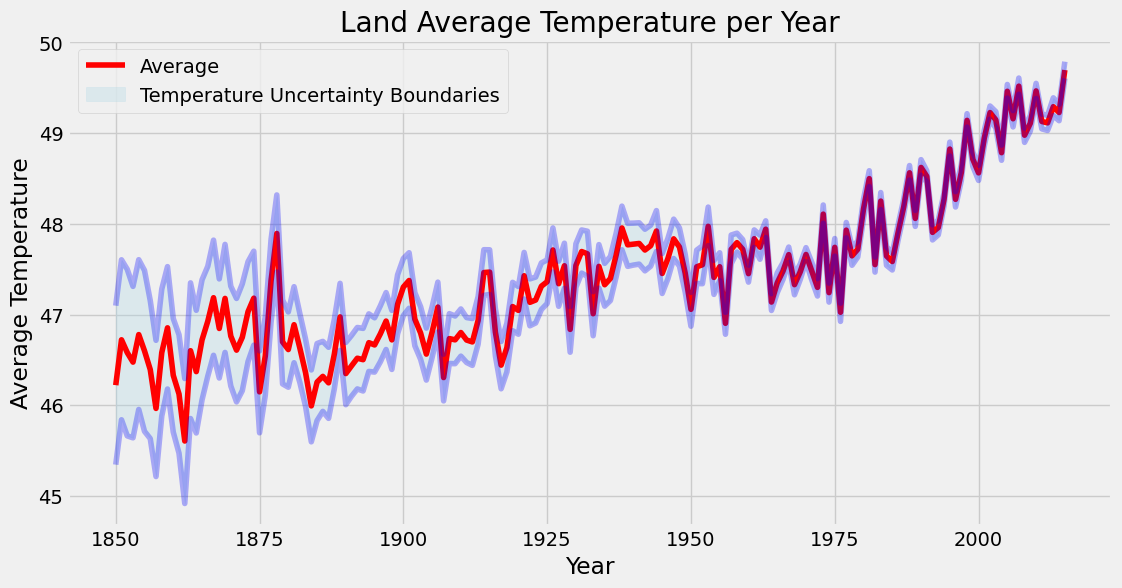

In [18]:
def plot_average_temp(df,col1,col2,label):
  cols = [col1,col2]
  temp_df = df[cols]
  average_per_year = temp_df.groupby(temp_df.index)[cols].mean()
  average_per_year['lower temp'] = average_per_year[col1] - average_per_year[col2]
  average_per_year['upper temp'] = average_per_year[col1] + average_per_year[col2]

  plt.figure(figsize=(12,6))
  plt.plot(average_per_year.index, average_per_year[col1], color='red', label='Average')
  plt.plot(average_per_year.index, average_per_year['upper temp'], color='blue', alpha=0.3)
  plt.plot(average_per_year.index, average_per_year['lower temp'], color='blue', alpha=0.3)
  plt.fill_between(average_per_year.index, average_per_year['upper temp'], average_per_year['lower temp'], color='lightblue', alpha=0.3, label='Temperature Uncertainty Boundaries')
  plt.xlabel('Year')
  plt.ylabel('Average Temperature')
  plt.title(label)
  plt.legend(loc='best')

# Land Average Temperature
plot_average_temp(temp_df_cleaned,'LandAverageTemperature','LandAverageTemperatureUncertainty','Land Average Temperature per Year')


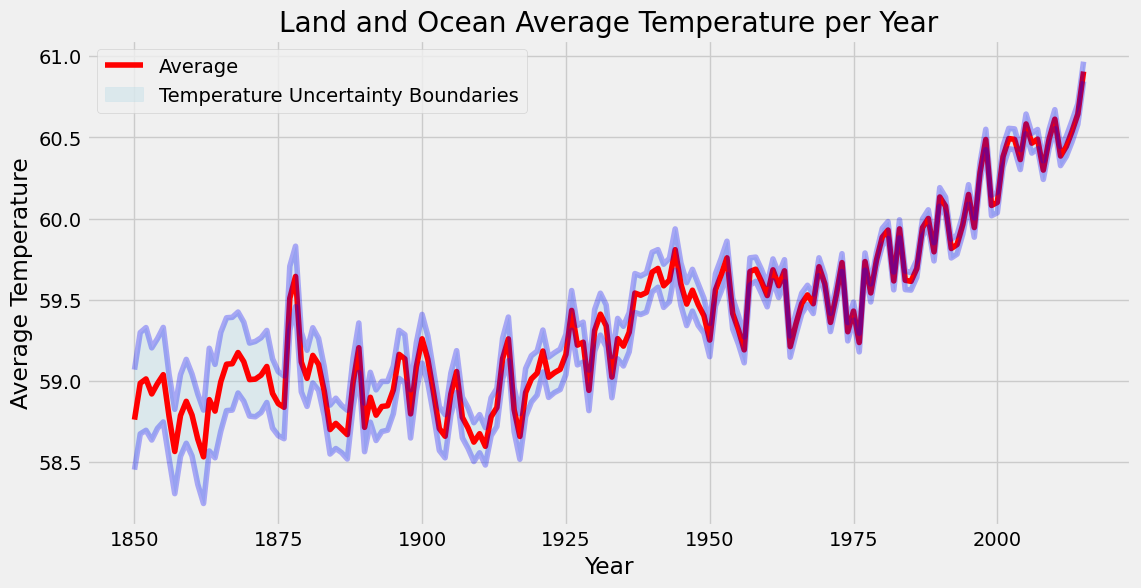

In [19]:
# Land and Ocean Average Temperature
plot_average_temp(temp_df_cleaned,'LandAndOceanAverageTemperature','LandAndOceanAverageTemperatureUncertainty','Land and Ocean Average Temperature per Year')

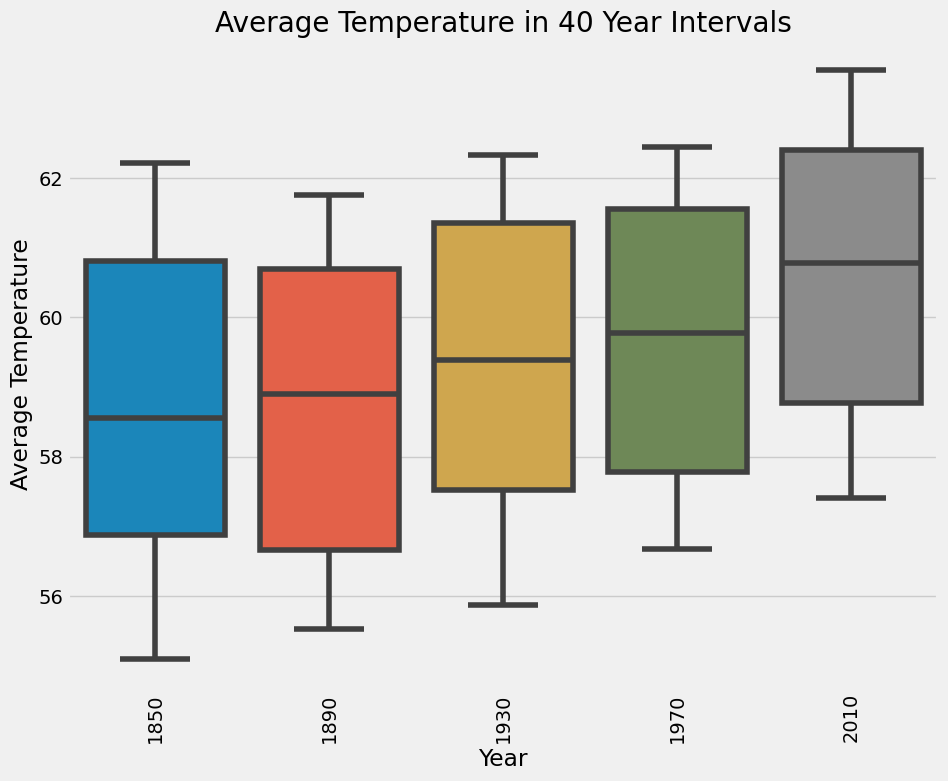

In [20]:
year_intervals = [1850, 1890, 1930, 1970, 2010]
temp_df_every_40_years = temp_df_cleaned[temp_df_cleaned.index.isin(year_intervals)]
fig, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(data = temp_df_cleaned, x=temp_df_every_40_years.index, y=temp_df_every_40_years['LandAndOceanAverageTemperature'] )
ax.set(ylabel='Average Temperature', title="Average Temperature in 40 Year Intervals")
for item in ax.get_xticklabels():
    item.set_rotation(90)

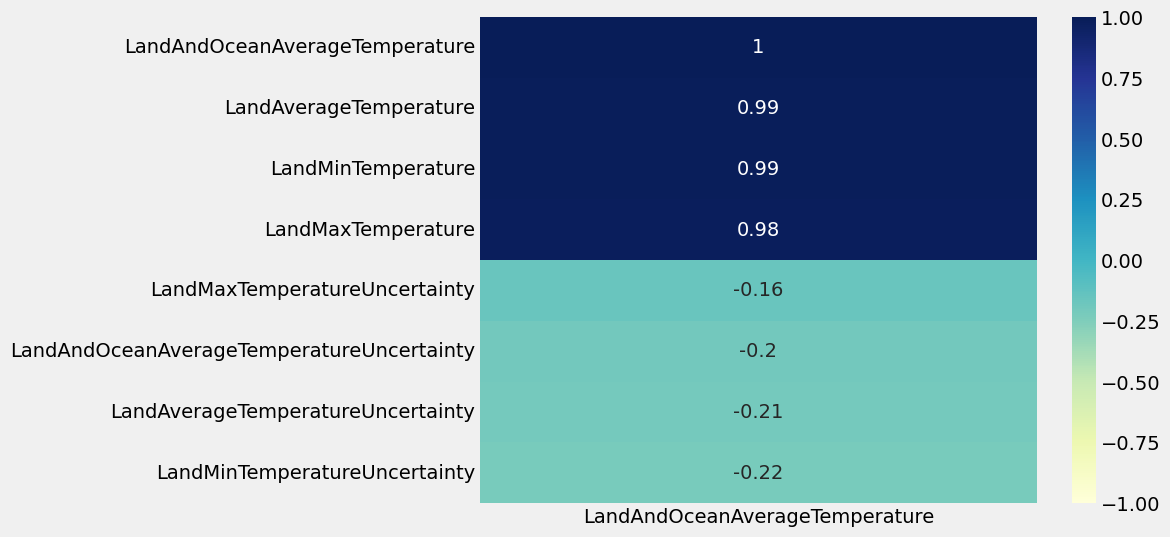

In [21]:
fig, ax = plt.subplots(figsize=(8,6))
corr_matrix = np.abs(temp_df_cleaned.corr())
sns.heatmap(temp_df_cleaned.corr()[['LandAndOceanAverageTemperature']].sort_values('LandAndOceanAverageTemperature').tail(10),
 vmax=1, vmin=-1, cmap='YlGnBu', annot=True, ax=ax);
ax.invert_yaxis()

In [22]:
def reduce_df(df):
  # Create a copy of the original dataframe
  df = df.copy()

  # Drop LandMaxTemperatureUncertainty, LandAndOceanAverageTemperatureUncertainty,
  # LandMinTemperatureUncertainty and LandMinTemperatureUncertainty
  cols_to_drop = ['LandMaxTemperatureUncertainty','LandAndOceanAverageTemperatureUncertainty',
                'LandAverageTemperatureUncertainty','LandMinTemperatureUncertainty']
  df = df.drop(cols_to_drop,axis=1)
  return df

reduced_temperature_df = reduce_df(temp_df_cleaned)

In [23]:
# Features, X
X = reduced_temperature_df.drop('LandAndOceanAverageTemperature',axis=1)
# Target, Y
Y = reduced_temperature_df['LandAndOceanAverageTemperature']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=40)
print("Size of X_train: ", X_train.shape)
print("Size of X_test: ", X_test.shape)
print("Size of y_train: ", y_train.shape)
print("Size of y_test: ", y_test.shape)

Size of X_train:  (1494, 3)
Size of X_test:  (498, 3)
Size of y_train:  (1494,)
Size of y_test:  (498,)


In [25]:
y_pred = [y_train.mean()] * len(y_train)

# MAE
print('Base MAE (in degrees):', round(mean_absolute_error(y_train,y_pred),2))

Base MAE (in degrees): 2.03


In [26]:
# Capture k-fold output in a dataframe for comparisons
kfold_df = pd.DataFrame(columns=['Model','Fold_1','Fold_2','Fold_3','Fold_4','Fold_5'])
kfold_mae_df = pd.DataFrame(columns=['Model','Fold_1','Fold_2','Fold_3','Fold_4','Fold_5'])

In [27]:
# Returns a dictionary of statistics to compare model variance provided that
# five folds are defined.
def kfold_xval(model,train_data,target_data,**kwargs):
    num_folds = kwargs.get('num_folds',10)
    ret_5 = kwargs.get('ret_5',num_folds==5)
    print("Cross-validation using {} folds".format(num_folds))
    cross_val_array = cross_val_score(model, train_data, target_data, scoring="explained_variance",cv=num_folds)
    if ret_5:
        ret_dict = {'Model': str(model),
                    'Fold_1': cross_val_array[0],
                    'Fold_2': cross_val_array[1],
                    'Fold_3': cross_val_array[2],
                    'Fold_4': cross_val_array[3],
                    'Fold_5': cross_val_array[4],
                   }
        print("Explained Variance:", ret_dict)
        return(ret_dict)
    else:
        print(cross_val_array)

In [28]:
# Returns a dictonary of statistics to compare model absolute error provided that
# five folds are defined.
def kfold_xval_mae(model,train_data,target_data,**kwargs):
    num_folds = kwargs.get('num_folds',10)
    ret_5 = kwargs.get('ret_5',num_folds==5)
    print("Cross-validation using {} folds".format(num_folds))
    # Minimizing MAE is equivalent to maximizing negative-MAE
    mae_val_array = cross_val_score(model, train_data, target_data, scoring="neg_mean_absolute_error", cv=num_folds)
    if ret_5:
        ret_dict = {'Model': str(model),
                    'Fold_1': mae_val_array[0],
                    'Fold_2': mae_val_array[1],
                    'Fold_3': mae_val_array[2],
                    'Fold_4': mae_val_array[3],
                    'Fold_5': mae_val_array[4],
                   }
        print("Negative Mean Absolute Error:", ret_dict)
        return(ret_dict)
    else:
        print(mae_val_array)

In [29]:
def comp_train_test(model,X_train,y_train,X_test,y_test):
    model.fit(X_train,y_train)

    # Make predictions
    y_preds_train = model.predict(X_train)
    y_preds_test = model.predict(X_test)

    fig, ax = plt.subplots(figsize=(8, 6))
    tips = sns.load_dataset("tips")
    ax = sns.regplot(data=tips,x=y_test,y=y_preds_test,scatter_kws={"color": "blue", 'alpha':0.3}, line_kws={"color": "red"})
    ax.set(xlabel='Test value', ylabel='Predicted value',title='Test values vs. predicted values,\n{}'.format(str(model)))
    plt.show()

    print("------------------------- Test set statistics -------------------------")
    print("R-squared of the model on the test set is: {}".format(model.score(X_test, y_test)))
    print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
    print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
    print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
    print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

In [30]:
linear = LinearRegression()
cv_results = kfold_xval(linear,X_train,y_train,num_folds=5)
kfold_df = pd.concat([kfold_df, pd.DataFrame.from_records([cv_results])])

Cross-validation using 5 folds
Explained Variance: {'Model': 'LinearRegression()', 'Fold_1': 0.9790021382761838, 'Fold_2': 0.9806291756390131, 'Fold_3': 0.9757299466116123, 'Fold_4': 0.9775378050166059, 'Fold_5': 0.9701140029742552}


/tmp/ipykernel_18/794317056.py:3: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  kfold_df = pd.concat([kfold_df, pd.DataFrame.from_records([cv_results])])


In [31]:
mae_results = kfold_xval_mae(linear,X_train,y_train,num_folds=5)
kfold_mae_df = pd.concat([kfold_mae_df, pd.DataFrame.from_records([mae_results])])

Cross-validation using 5 folds
Negative Mean Absolute Error: {'Model': 'LinearRegression()', 'Fold_1': -0.2680716464157339, 'Fold_2': -0.2581595143560645, 'Fold_3': -0.2915668637283162, 'Fold_4': -0.2903737711788681, 'Fold_5': -0.31607779226470484}


/tmp/ipykernel_18/1352722626.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  kfold_mae_df = pd.concat([kfold_mae_df, pd.DataFrame.from_records([mae_results])])


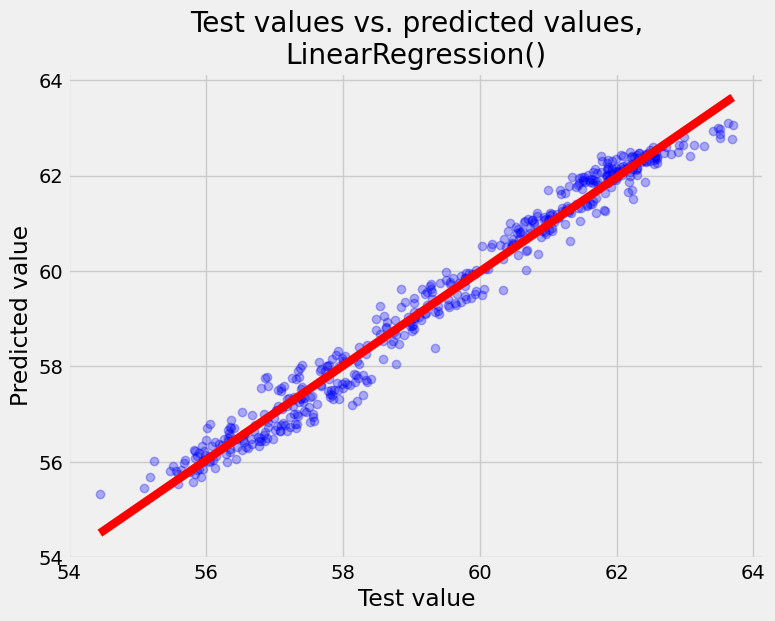

------------------------- Test set statistics -------------------------
R-squared of the model on the test set is: 0.9786110435505881
Mean absolute error of the prediction is: 0.2678993528424019
Mean squared error of the prediction is: 0.11143336885310137
Root mean squared error of the prediction is: 0.33381636995974506
Mean absolute percentage error of the prediction is: 0.45280798963265


In [32]:
comp_train_test(linear,X_train,y_train,X_test,y_test)

<Axes: title={'center': 'Elbow Curve from RMSE'}, xlabel='k', ylabel='RMSE'>

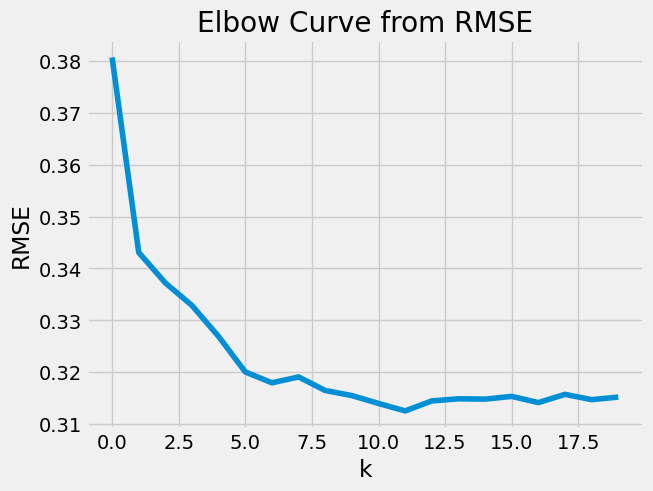

In [33]:
# Find the RMSE to plot an Elbow Curve
rmse_val = [] # Store RMSE values for different k
for k in range(20):
    k = k+1
    model = neighbors.KNeighborsRegressor(n_neighbors = k)

    model.fit(X_train, y_train)  # Fit the model
    pred=model.predict(X_test) # Make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) # Calculate RMSE
    rmse_val.append(error) # Store RMSE values

figsize=(8, 6)
curve = pd.DataFrame(rmse_val) # Elbow curve
curve.plot(title="Elbow Curve from RMSE", xlabel="k", ylabel="RMSE", legend=None)

In [34]:
knn_model = neighbors.KNeighborsRegressor(n_neighbors = 8) # By the Elbow curve above, we set k = 8
cv_results = kfold_xval(knn_model,X_train,y_train,num_folds=5)
kfold_df = pd.concat([kfold_df, pd.DataFrame.from_records([cv_results])])

Cross-validation using 5 folds
Explained Variance: {'Model': 'KNeighborsRegressor(n_neighbors=8)', 'Fold_1': 0.9809384548066171, 'Fold_2': 0.9839072308429347, 'Fold_3': 0.9790453802746185, 'Fold_4': 0.9819610450484438, 'Fold_5': 0.9757135706086074}


In [35]:
mae_results = kfold_xval_mae(knn_model,X_train,y_train,num_folds=5)
kfold_mae_df = pd.concat([kfold_mae_df, pd.DataFrame.from_records([mae_results])])

Cross-validation using 5 folds
Negative Mean Absolute Error: {'Model': 'KNeighborsRegressor(n_neighbors=8)', 'Fold_1': -0.25181187290969914, 'Fold_2': -0.22590526755852863, 'Fold_3': -0.2614003344481607, 'Fold_4': -0.24466831103678946, 'Fold_5': -0.2645282718120809}


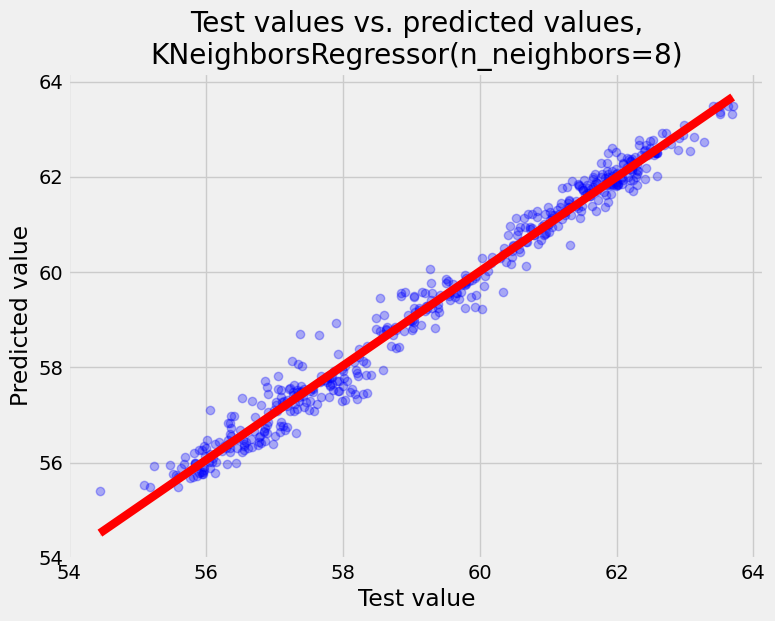

------------------------- Test set statistics -------------------------
R-squared of the model on the test set is: 0.9804517404190591
Mean absolute error of the prediction is: 0.23886099397590374
Mean squared error of the prediction is: 0.10184360445406632
Root mean squared error of the prediction is: 0.3191294478014624
Mean absolute percentage error of the prediction is: 0.40515812866611967


In [36]:
comp_train_test(knn_model,X_train,y_train,X_test,y_test)

In [37]:
rf_model = ensemble.RandomForestRegressor(n_estimators=10, n_jobs=-1)
cv_results = kfold_xval(rf_model,X_train,y_train,num_folds=5)
kfold_df = pd.concat([kfold_df, pd.DataFrame.from_records([cv_results])])

Cross-validation using 5 folds
Explained Variance: {'Model': 'RandomForestRegressor(n_estimators=10, n_jobs=-1)', 'Fold_1': 0.9777651529225352, 'Fold_2': 0.9827372983615954, 'Fold_3': 0.9802857627595454, 'Fold_4': 0.9792571983195176, 'Fold_5': 0.9759276768857815}


In [38]:
mae_results = kfold_xval_mae(rf_model,X_train,y_train,num_folds=5)
kfold_mae_df = pd.concat([kfold_mae_df, pd.DataFrame.from_records([mae_results])])

Cross-validation using 5 folds
Negative Mean Absolute Error: {'Model': 'RandomForestRegressor(n_estimators=10, n_jobs=-1)', 'Fold_1': -0.26527846153846135, 'Fold_2': -0.2284687625418063, 'Fold_3': -0.2534068896321077, 'Fold_4': -0.2543839464882945, 'Fold_5': -0.26872671140939547}


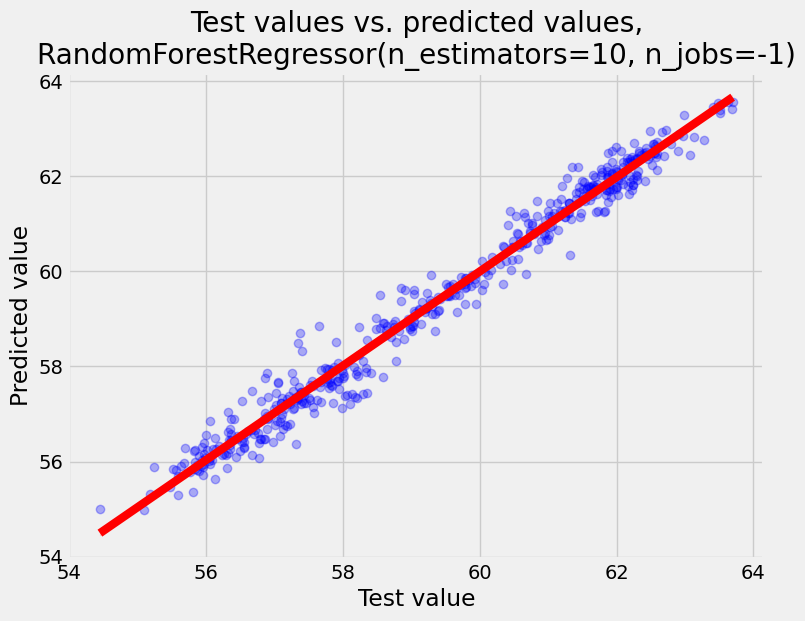

------------------------- Test set statistics -------------------------
R-squared of the model on the test set is: 0.978111347605422
Mean absolute error of the prediction is: 0.2500836144578313
Mean squared error of the prediction is: 0.11403671243855446
Root mean squared error of the prediction is: 0.33769322237580435
Mean absolute percentage error of the prediction is: 0.4231614976547248


In [39]:
comp_train_test(rf_model,X_train,y_train,X_test,y_test)


In [40]:
svm_model = SVR(kernel = 'rbf')
cv_results = kfold_xval(svm_model,X_train,y_train,num_folds=5)
kfold_df = pd.concat([kfold_df, pd.DataFrame.from_records([cv_results])])

Cross-validation using 5 folds
Explained Variance: {'Model': 'SVR()', 'Fold_1': 0.9796499524935859, 'Fold_2': 0.9814053019765446, 'Fold_3': 0.9759924440122779, 'Fold_4': 0.9780082669633328, 'Fold_5': 0.9715311224630794}


In [41]:
mae_results = kfold_xval_mae(svm_model,X_train,y_train,num_folds=5)
kfold_mae_df = pd.concat([kfold_mae_df, pd.DataFrame.from_records([mae_results])])

Cross-validation using 5 folds
Negative Mean Absolute Error: {'Model': 'SVR()', 'Fold_1': -0.26107237293172747, 'Fold_2': -0.2481340686191278, 'Fold_3': -0.2817306640246269, 'Fold_4': -0.286146139945242, 'Fold_5': -0.3077658101932516}


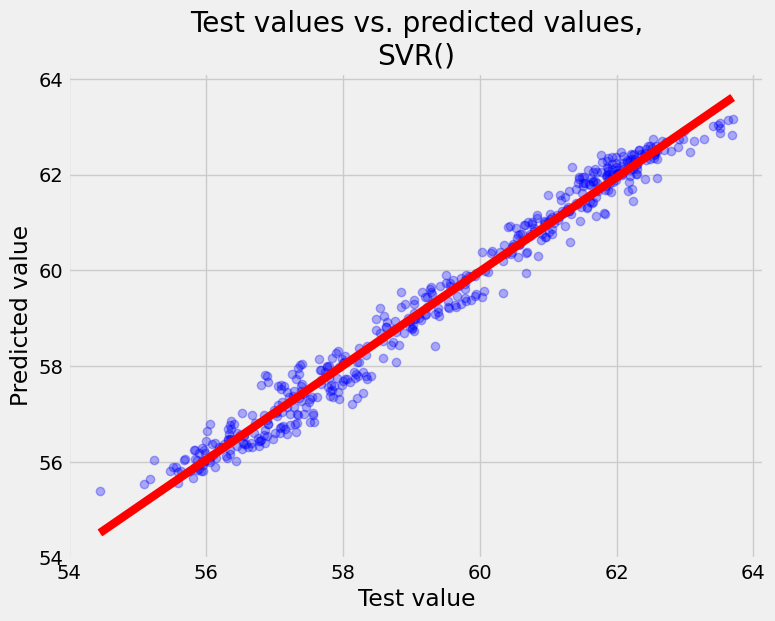

------------------------- Test set statistics -------------------------
R-squared of the model on the test set is: 0.9793654650881497
Mean absolute error of the prediction is: 0.2582612535618929
Mean squared error of the prediction is: 0.10750294178132494
Root mean squared error of the prediction is: 0.32787641235887177
Mean absolute percentage error of the prediction is: 0.43687139827629135


In [42]:
comp_train_test(svm_model,X_train,y_train,X_test,y_test)

In [43]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
fold_cols = ['Fold_1','Fold_2','Fold_3','Fold_4','Fold_5']
kfold_df['avg_explained_variance'] = kfold_df[fold_cols].mean(axis=1)
kfold_df.sort_values(['avg_explained_variance'],ascending=False)
kfold_df.style.hide(axis="index")

Model,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5,avg_explained_variance
LinearRegression(),0.979002,0.980629,0.975730,0.977538,0.970114,0.976603
KNeighborsRegressor(n_neighbors=8),0.980938,0.983907,0.979045,0.981961,0.975714,0.980313
"RandomForestRegressor(n_estimators=10, n_jobs=-1)",0.977765,0.982737,0.980286,0.979257,0.975928,0.979195
SVR(),0.979650,0.981405,0.975992,0.978008,0.971531,0.977317


In [44]:
pd.set_option('display.float_format', lambda x: '%.4f' % x)
kfold_mae_df['avg_neg_means_abs_error'] = kfold_mae_df[fold_cols].mean(axis=1)
kfold_mae_df.sort_values(['avg_neg_means_abs_error'],ascending=False)
kfold_mae_df.style.hide(axis="index")

Model,Fold_1,Fold_2,Fold_3,Fold_4,Fold_5,avg_neg_means_abs_error
LinearRegression(),-0.268072,-0.258160,-0.291567,-0.290374,-0.316078,-0.284850
KNeighborsRegressor(n_neighbors=8),-0.251812,-0.225905,-0.261400,-0.244668,-0.264528,-0.249663
"RandomForestRegressor(n_estimators=10, n_jobs=-1)",-0.265278,-0.228469,-0.253407,-0.254384,-0.268727,-0.254053
SVR(),-0.261072,-0.248134,-0.281731,-0.286146,-0.307766,-0.276970


In [45]:
# MAE
print('KNN Regressor Train MAE (in degrees):', round(mean_absolute_error(y_train,knn_model.predict(X_train)),2))
print('KNN Regressor Test MAE (in degrees):', round(mean_absolute_error(y_test,knn_model.predict(X_test)),2))

KNN Regressor Train MAE (in degrees): 0.21
KNN Regressor Test MAE (in degrees): 0.24


In [46]:
mape = mean_absolute_percentage_error(y_test, knn_model.predict(X_test)) * 100
accuracy = 100 - mape
print("Accuracy of Gradient Boosting Model:", round(accuracy,2), "%.")

Accuracy of Gradient Boosting Model: 99.59 %.


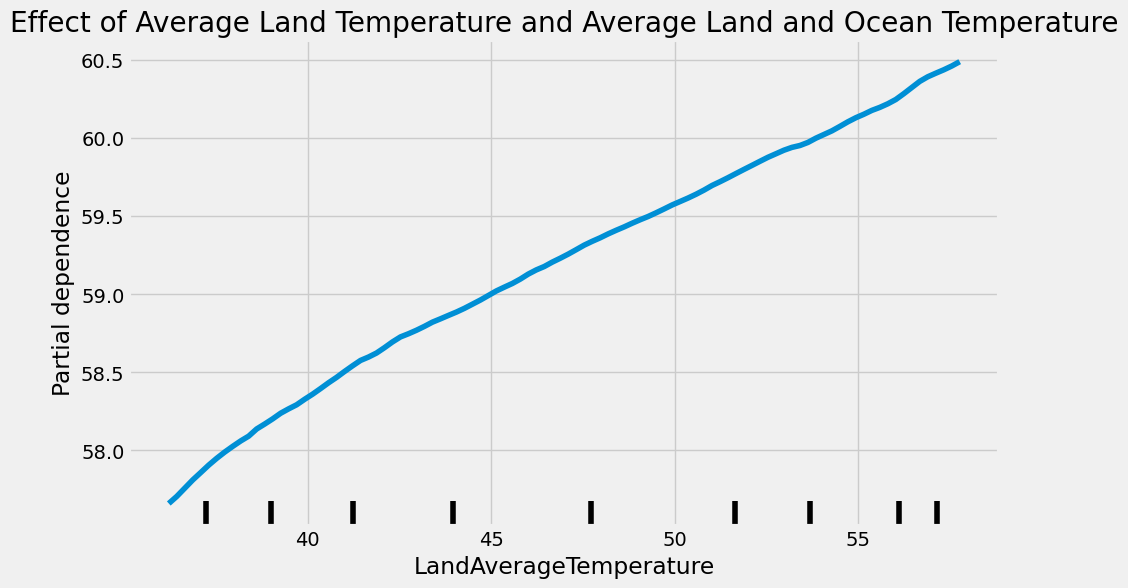

In [47]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Effect of Average Land Temperature and Average Land and Ocean Temperature")
# The feature that we want to compare against our model to see the net effect on the model prediction (our target)
feature = ['LandAverageTemperature' ]
gb_disp = PartialDependenceDisplay.from_estimator(knn_model, X_test, feature, ax=ax)

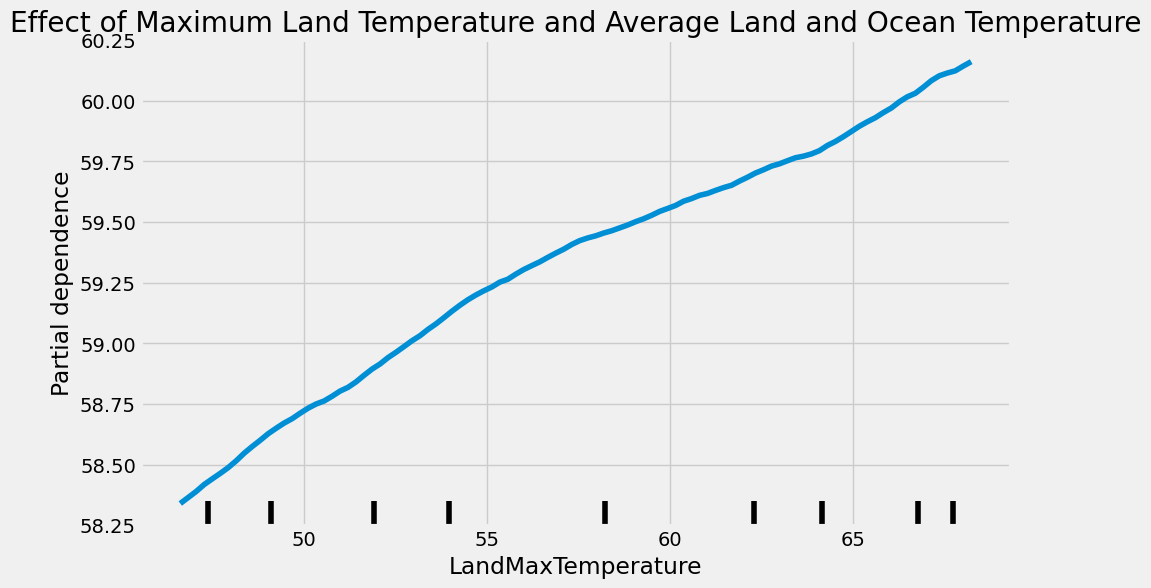

In [48]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Effect of Maximum Land Temperature and Average Land and Ocean Temperature")
feature = ['LandMaxTemperature']
gb_disp = PartialDependenceDisplay.from_estimator(knn_model, X_test, feature, ax=ax)

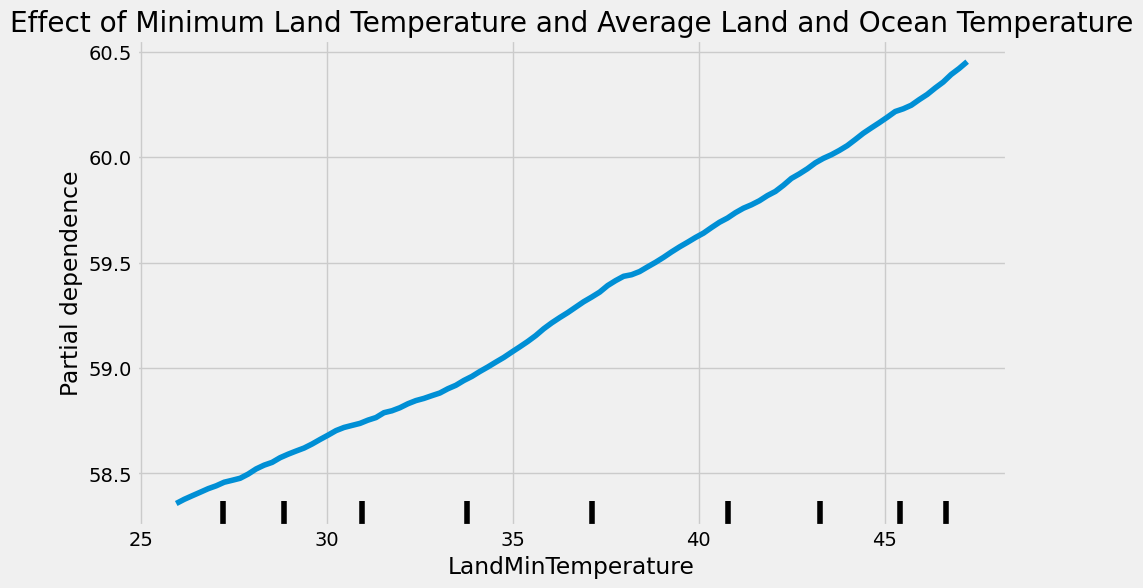

In [49]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title("Effect of Minimum Land Temperature and Average Land and Ocean Temperature")
# The feature that we want to compare against our model to see the net effect on the model prediction (our target)
feature = ['LandMinTemperature']
gb_disp = PartialDependenceDisplay.from_estimator(knn_model, X_test, feature, ax=ax)

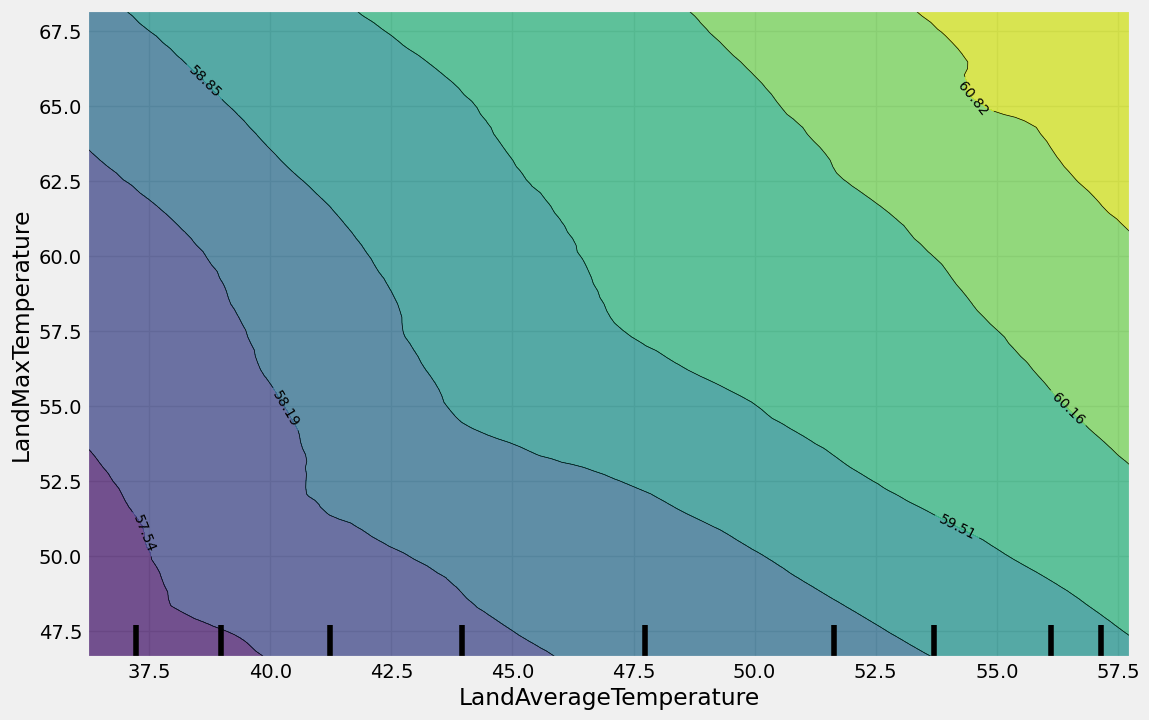

In [50]:
features = [('LandAverageTemperature','LandMaxTemperature')];
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(knn_model, X_test, features,ax=ax)
plt.show()

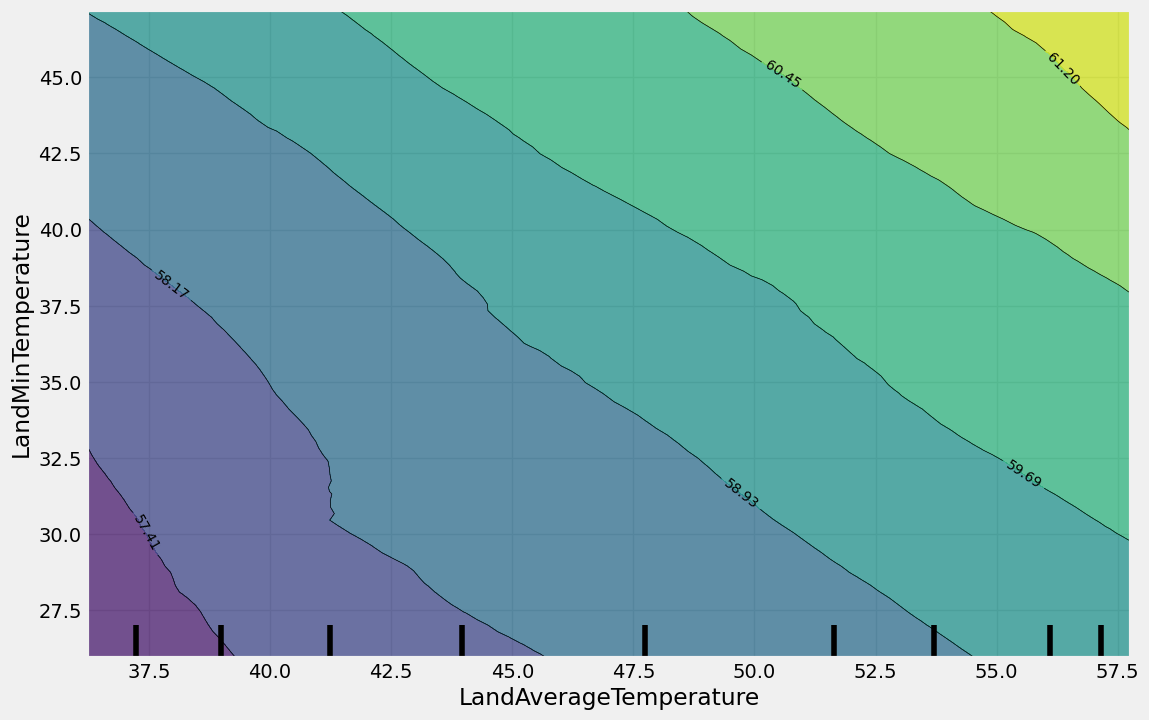

In [51]:
features = [('LandAverageTemperature','LandMinTemperature')];
fig, ax = plt.subplots(figsize=(12, 8))
PartialDependenceDisplay.from_estimator(knn_model, X_test, features,ax=ax)
plt.show()